In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
#import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
#import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

### Loading in the data

After we've downloaded the data, we need to get it into the notebook.

I've stored my downloaded data in a file called `data`.

In [2]:
# Import train & test data 
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv') # example of what a submission should look like

In [3]:
# View the training data
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


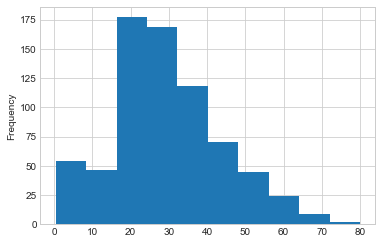

In [5]:
train.Age.plot.hist()

In [6]:
# View the test data (same columns as the training data)
test.head() # head = view first 5 lines

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# View the example submisison dataframe
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Data Descriptions

**Survival:** 0 = No, 1 = Yes

**pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd

**sex:** Sex

**Age:** Age in years

**sibsp:** number of siblings/spouses aboard the Titanic

**parch:** number of parents/children aboard the Titanic

**ticket:** Ticket number

**fare:** Passenger fare

**cabin:** Cabin number

**embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
train.describe()

## What missing values are there?

Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

In [ ]:
# Plot graphic of missing values
missingno.matrix(train, figsize = (30,10))

Ok we can clearly see some missing values here. Especially in the cabin column.

It's important to visualise missing values early so you know where the major holes are in your dataset.

Knowing this informaiton will help with your EDA and figuring out what kind of data cleaning and preprocessing is needed.

In [ ]:
# Alternatively, you can see the number of missing values like this
train.isnull().sum()

In [5]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

## What datatypes are in the dataframe?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

However, as we dig deeper, we might find features which are numerical may actually be categorical.

The goal for the next few steps is to figure out how best to process the data so our machine learning model can learn from it.

Ideally, all the features will be encoded into a numerical value of some kind. 

In [ ]:
# Different data types in the dataset
train.dtypes

In [ ]:
train.head()

### Target Feature: Survived

Description: Whether the passenger survived or not.
    
Key: 0 = did not survive, 1 = survived
    
This is the variable we want our machine learning model to predict based off all the others.

0    549
1    342
Name: Survived, dtype: int64


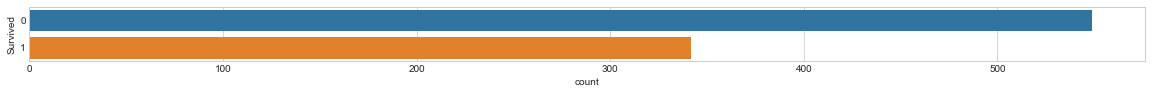

In [6]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [7]:
# Let's add this to our subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [8]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [9]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Feature: Pclass

Description: The ticket class of the passenger.
    
Key: 1 = 1st, 2 = 2nd, 3 = 3rd

#### Let's plot the distribution
We will look at the distribution of each feature first if we can to understand what kind of spread there is across the dataset.

For example, if there are values which are completely outside of the distribution, we may not want to include them in our model.

In [ ]:
sns.distplot(train.Pclass)

In [10]:
dummies=pd.get_dummies(train.Pclass)
merged=pd.concat([df_bin,dummies],axis='columns')


In [11]:
df_bin=merged

dummies

In [12]:
df_bin=df_bin.drop([3],axis='columns')


In [13]:
df_bin.rename(columns = {1:'class1', 2:'class2'}, inplace = True)

We can see with this feature, the values are numerical (1, 2 and 3) but they are categories.

How do we know this? Because a passenger in Class 3 doesn't necessarily equal a passenger in Class 2 + a passenger in Class 1.

In [14]:
df_bin

,Survived,class1,class2
0,0,0,0
1,1,1,0
2,1,0,0
3,1,1,0
4,0,0,0
5,0,0,0
6,0,1,0
7,0,0,0
8,1,0,0
9,1,0,1


In [16]:
# How many missing variables does Pclass have?
train.Pclass.isnull().sum()

0

Since there are no missing values in Pclass, let's add it to our sub dataframes.

### Feature: Name
    
Description: The name of the passenger.

In [17]:
# How many different names are there?
train.Name.value_counts()

Morley, Mr. William                                     1
Nakid, Mr. Sahid                                        1
Goodwin, Master. William Frederick                      1
McMahon, Mr. Martin                                     1
Partner, Mr. Austen                                     1
Sage, Master. Thomas Henry                              1
Norman, Mr. Robert Douglas                              1
Sagesser, Mlle. Emma                                    1
Farrell, Mr. James                                      1
Mannion, Miss. Margareth                                1
Sage, Miss. Constance Gladys                            1
Hamalainen, Mrs. William (Anna)                         1
Ford, Miss. Robina Maggie "Ruby"                        1
Milling, Mr. Jacob Christian                            1
Pengelly, Mr. Frederick William                         1
Torber, Mr. Ernst William                               1
Olsvigen, Mr. Thor Anderson                             1
Clarke, Mrs. C

In [ ]:
for index in train.iteritems():
    print(train['Name'])

In [15]:
new_bin=train.Name.str.split().apply(lambda x : x[1])

In [16]:
new_bin

0             Mr.
1            Mrs.
2           Miss.
3            Mrs.
4             Mr.
5             Mr.
6             Mr.
7         Master.
8            Mrs.
9            Mrs.
10          Miss.
11          Miss.
12            Mr.
13            Mr.
14          Miss.
15           Mrs.
16        Master.
17            Mr.
18        Planke,
19           Mrs.
20            Mr.
21            Mr.
22          Miss.
23            Mr.
24          Miss.
25           Mrs.
26            Mr.
27            Mr.
28          Miss.
29            Mr.
          ...    
861           Mr.
862          Mrs.
863         Miss.
864           Mr.
865          Mrs.
866             y
867           Mr.
868    Melkebeke,
869       Master.
870           Mr.
871          Mrs.
872           Mr.
873     Cruyssen,
874          Mrs.
875         Miss.
876           Mr.
877           Mr.
878           Mr.
879          Mrs.
880          Mrs.
881           Mr.
882         Miss.
883           Mr.
884           Mr.
885       

In [17]:
df_bin["category"]=new_bin

In [18]:
dummies=pd.get_dummies(df_bin.category)

In [19]:
dummiesfinal=dummies[['Mr.','Mrs.','Miss.','Master.','Capt.','Col.']]

In [20]:
df_bin.drop(['category'],axis='columns')
df_bin=pd.concat([df_bin,dummiesfinal],axis='columns')


In [21]:
df_bin.drop(['category'],axis='columns')

,Survived,class1,class2,Mr.,Mrs.,Miss.,Master.,Capt.,Col.
0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0
3,1,1,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0
6,0,1,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0
8,1,0,0,0,1,0,0,0,0
9,1,0,1,0,1,0,0,0,0


In [23]:
df_bin=df_bin.drop(columns='category')

In [24]:
df_bin

,Survived,class1,class2,Mr.,Mrs.,Miss.,Master.,Capt.,Col.
0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0
3,1,1,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0
6,0,1,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0
8,1,0,0,0,1,0,0,0,0
9,1,0,1,0,1,0,0,0,0


### Feature: Sex

Description: The sex of the passenger (male or female).

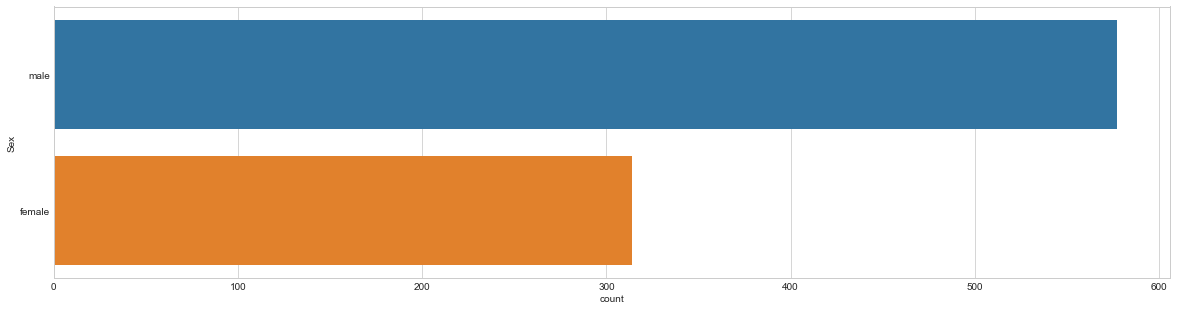

In [18]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train);

In [19]:
# Are there any missing values in the Sex column?
train.Sex.isnull().sum()

0

In [20]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [21]:
df_bin

,Survived,class1,class2,category,Mr.,Mrs.,Miss.,Master.,Capt.,Col.
0,0,0,0,Mr.,1,0,0,0,0,0
1,1,1,0,Mrs.,0,1,0,0,0,0
2,1,0,0,Miss.,0,0,1,0,0,0
3,1,1,0,Mrs.,0,1,0,0,0,0
4,0,0,0,Mr.,1,0,0,0,0,0
5,0,0,0,Mr.,1,0,0,0,0,0
6,0,1,0,Mr.,1,0,0,0,0,0
7,0,0,0,Master.,0,0,0,1,0,0
8,1,0,0,Mrs.,0,1,0,0,0,0
9,1,0,1,Mrs.,0,1,0,0,0,0


In [25]:
train['Sex']=train.Sex.map({'female':0,"male":1})

In [26]:
train['Sex']

0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [27]:
df_bin["Sex"]=train["Sex"]

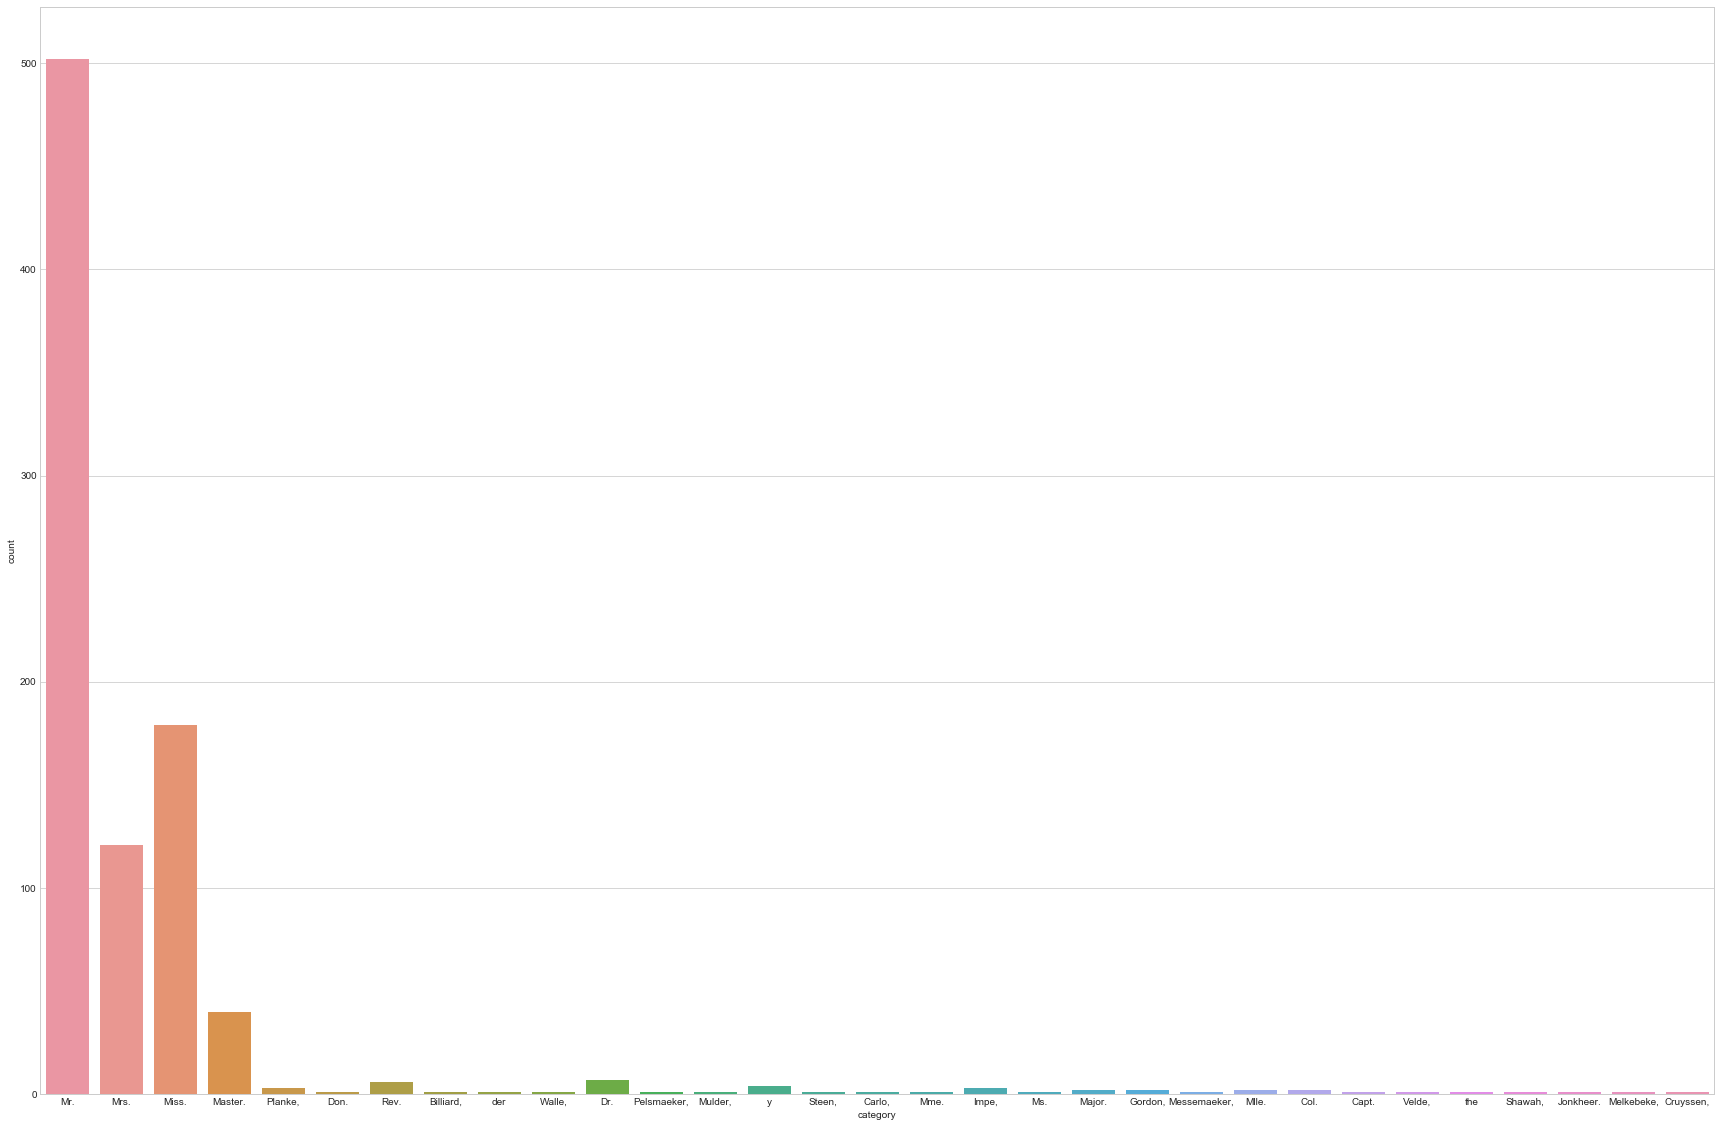

In [25]:
plt.figure(figsize=(30,20))
sns.countplot(x=df_bin['category'])

In [28]:
df_bin

,Survived,class1,class2,Mr.,Mrs.,Miss.,Master.,Capt.,Col.,Sex
0,0,0,0,1,0,0,0,0,0,1
1,1,1,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1
5,0,0,0,1,0,0,0,0,0,1
6,0,1,0,1,0,0,0,0,0,1
7,0,0,0,0,0,0,1,0,0,1
8,1,0,0,0,1,0,0,0,0,0
9,1,0,1,0,1,0,0,0,0,0


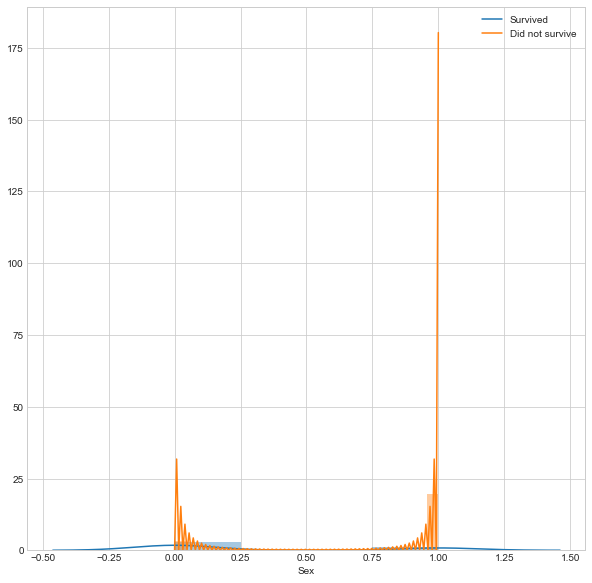

In [33]:
# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

Not many people survived. But of those who did, more were female.

### Feature: Age

Description: The age of the passenger.

In [34]:
# How many missing values does age have?
train.Age.isnull().sum()

177

In [35]:
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [47]:
def myfunc(df_bin):
    if df_bin['category']=="Mr." or df_bin['category']=="Mrs." or df_bin["category"]=="Capt." or df_bin['categpry']=='Col.':
        df_bin["Age"]=25
    else:
        df_bin["Age"]=14

In [48]:
df_bin['Age']=train['Age']

In [ ]:
# Once the Age values have been fixed up, we can add them to our sub dataframes.
# df_bin['Age'] = pd.cut(train['Age'], 10) # bucketed/binned into different categories
# df_con['Age'] = train['Age'] # non-buckete
dummiesfinal=dummies[['Mr.','Mrs.','Miss.','Master.','Capt.','Col.']]

#### Function to create count and distribution visualisations

In [29]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

### Feature: SibSp

Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [27]:
# How many missing values does SibSp have?
train.SibSp.isnull().sum()

0

In [ ]:
# What values are there?
train.SibSp.value_counts()

Let's add SibSp to our subset dataframes and view the distributions.

In [30]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

In [ ]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

What does the graph on the right tell us?

### Feature: Parch

Description: The number of parents/children the passenger has aboard the Titanic.

Since this feature is similar to SibSp, we'll do a similar analysis.

In [29]:
# How many missing values does Parch have?
train.Parch.isnull().sum()

0

In [ ]:
# What values are there?
train.Parch.value_counts()

In [31]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

In [ ]:
# Visualise the counts of Parch and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

What does the graph on the right tell us about `Parch`?

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_con.head()

In [33]:
df_bin.drop(columns='category')

,Survived,class1,class2,Mr.,Mrs.,Miss.,Master.,Capt.,Col.,Sex,SibSp,Parch
0,0,0,0,1,0,0,0,0,0,1,1,0
1,1,1,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0,0,0,1,0,0
6,0,1,0,1,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1,0,0,1,3,1
8,1,0,0,0,1,0,0,0,0,0,0,2
9,1,0,1,0,1,0,0,0,0,0,1,0


### Feature: Ticket

Description: The ticket number of the boarding passenger.

In [ ]:
# How many missing values does Ticket have?
train.Ticket.isnull().sum()

In [ ]:
# How many kinds of ticket are there?
sns.countplot(y="Ticket", data=train);

That doesn't look too good, what about another way of looking at it?

In [59]:
# How many kinds of ticket are there?
train.Ticket.value_counts()

1601                7
347082              7
CA. 2343            7
CA 2144             6
3101295             6
347088              6
382652              5
S.O.C. 14879        5
PC 17757            4
113760              4
347077              4
19950               4
LINE                4
2666                4
113781              4
W./C. 6608          4
4133                4
17421               4
349909              4
371110              3
C.A. 31921          3
35273               3
PC 17582            3
C.A. 34651          3
248727              3
110152              3
345773              3
230080              3
PC 17755            3
24160               3
                   ..
347068              1
8471                1
364511              1
383121              1
365222              1
7546                1
PC 17475            1
350025              1
349201              1
349248              1
11771               1
3101264             1
STON/O2. 3101290    1
31028               1
2650      

In [ ]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

681 unique values is too many for now. So we won't use `Ticket` in our subset dataframes.

There may be some way to reduce this down. 

**Challenge:** How could you reduce the Ticket feature? Is it even possible?

*Hint:* It may be similar to what you could do with Name.

### Feature: Fare

Description: How much the ticket cost.

In [34]:
# How many missing values does Fare have?
train.Fare.isnull().sum()

0

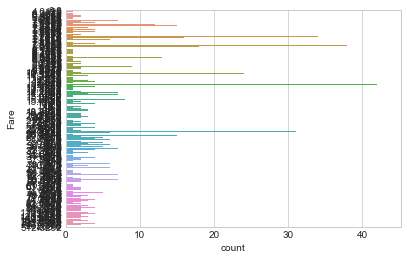

In [35]:
# How many different values of Fare are there?
sns.countplot(y="Fare", data=train);

In [36]:
# What kind of variable is Fare?
train.Fare.dtype

dtype('float64')

In [37]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


In [ ]:
df_bin

train['Fare'].plot(y='Fare',data=train)

Because Fare is a float (number) let's add it as it is to our continuous sub dataframe but to add it to our categorical sub dataframe, we'll cut it into bins.

In [32]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised 

In [33]:
# What do our Fare bins look like?
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [ ]:
# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

**Challenge:** How would you change the Fare bins?

### Feature: Cabin

Description: The cabin number where the passenger was staying.    

In [ ]:
# How many missing values does Cabin have?
train.Cabin.isnull().sum()

In [ ]:
train.head()

In [ ]:
# What do the Cabin values look like?
train.Cabin.value_counts()

In [72]:
#df_bin=df_bin.drop(columns="Embarked")
df_bin

,Survived,class1,class2,Mr.,Mrs.,Miss.,Master.,Capt.,Col.,Sex,SibSp,Parch,Fare,Embarkerd
0,0,0,0,1,0,0,0,0,0,1,1,0,"(-0.512, 102.466]",0
1,1,1,0,0,1,0,0,0,0,0,1,0,"(-0.512, 102.466]",1
2,1,0,0,0,0,1,0,0,0,0,0,0,"(-0.512, 102.466]",0
3,1,1,0,0,1,0,0,0,0,0,1,0,"(-0.512, 102.466]",0
4,0,0,0,1,0,0,0,0,0,1,0,0,"(-0.512, 102.466]",0
5,0,0,0,1,0,0,0,0,0,1,0,0,"(-0.512, 102.466]",2
6,0,1,0,1,0,0,0,0,0,1,0,0,"(-0.512, 102.466]",0
7,0,0,0,0,0,0,1,0,0,1,3,1,"(-0.512, 102.466]",0
8,1,0,0,0,1,0,0,0,0,0,0,2,"(-0.512, 102.466]",0
9,1,0,1,0,1,0,0,0,0,0,1,0,"(-0.512, 102.466]",1


Since there are too many missing values, we won't use Cabin for our initial models and won't add it to our sub dataframes.

But how could you modify cabin to be more usable?

What could you do about the missing values?

### Feature: Embarked

Description: The port where the passenger boarded the Titanic.
    
Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
# How many missing values does Embarked have?
train.Embarked.isnull().sum()

In [ ]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

Embarked is a categorical variable because there are 3 categories which a passenger could have boarded on.

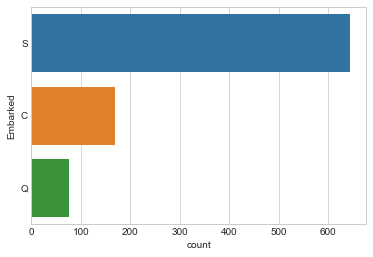

In [34]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

#### How can we deal with the 2 missing values of Embarked?

One option is to drop the two rows which don't have an Embarked value.

Another option would be to randomly assign a value of C, Q or S to each row.

What are the pros and cons of each?

For now, we will remove those rows.

In [35]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [36]:
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


We've removed the two rows with missing values for Embarked, now we can add Embarked to our sub dataframes.

In [37]:
df_bin.head()

,Survived,class1,class2,Mr.,Mrs.,Miss.,Master.,Capt.,Col.,Sex,SibSp,Parch,Fare,Embarked
0,0,0,0,1,0,0,0,0,0,1,1,0,"(-0.512, 102.466]",S
1,1,1,0,0,1,0,0,0,0,0,1,0,"(-0.512, 102.466]",C
2,1,0,0,0,0,1,0,0,0,0,0,0,"(-0.512, 102.466]",S
3,1,1,0,0,1,0,0,0,0,0,1,0,"(-0.512, 102.466]",S
4,0,0,0,1,0,0,0,0,0,1,0,0,"(-0.512, 102.466]",S


In [39]:
one_hot_cols=df_bin.columns.tolist()
one_hot_cols

['Survived',
 'class1',
 'class2',
 'Mr.',
 'Mrs.',
 'Miss.',
 'Master.',
 'Capt.',
 'Col.',
 'Sex',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked']

In [40]:
df_con.head(10) 
df_bin['Embarkerd']=df_bin['Embarked'].map({"S":0,"C":1,"Q":2})

In [49]:
df_bin.drop('')

,Survived,class1,class2,category,Mr.,Mrs.,Miss.,Master.,Capt.,Col.,Sex,SibSp,Parch,Embarked,Embarkerd
0,0,0,0,Mr.,1,0,0,0,0,0,1,1,0,S,0
1,1,1,0,Mrs.,0,1,0,0,0,0,0,1,0,C,1
2,1,0,0,Miss.,0,0,1,0,0,0,0,0,0,S,0
3,1,1,0,Mrs.,0,1,0,0,0,0,0,1,0,S,0
4,0,0,0,Mr.,1,0,0,0,0,0,1,0,0,S,0
5,0,0,0,Mr.,1,0,0,0,0,0,1,0,0,Q,2
6,0,1,0,Mr.,1,0,0,0,0,0,1,0,0,S,0
7,0,0,0,Master.,0,0,0,1,0,0,1,3,1,S,0
8,1,0,0,Mrs.,0,1,0,0,0,0,0,0,2,S,0
9,1,0,1,Mrs.,0,1,0,0,0,0,0,1,0,C,1


In [79]:
df_bin["Embarkerd"]

0      0
1      1
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     2
17     0
18     0
19     1
20     0
21     0
22     2
23     0
24     0
25     0
26     1
27     0
28     2
29     0
      ..
861    0
862    0
863    0
864    0
865    0
866    1
867    0
868    0
869    0
870    0
871    0
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    0
881    0
882    0
883    0
884    0
885    2
886    0
887    0
888    0
889    1
890    2
Name: Embarkerd, Length: 889, dtype: int64

In [41]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

In [46]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_bin,df_embarked_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(columns='Embarked')

In [50]:
# Let's look at df_con_enc

df_con_enc.head(20)
df_con_enc=df_con_enc.drop(columns="Embarkerd")

### Let's seperate the data

In [73]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_bin

In [74]:
selected_df.head()

,Survived,class1,class2,Mr.,Mrs.,Miss.,Master.,Capt.,Col.,Sex,SibSp,Parch,Fare,Embarkerd
0,0,0,0,1,0,0,0,0,0,1,1,0,"(-0.512, 102.466]",0
1,1,1,0,0,1,0,0,0,0,0,1,0,"(-0.512, 102.466]",1
2,1,0,0,0,0,1,0,0,0,0,0,0,"(-0.512, 102.466]",0
3,1,1,0,0,1,0,0,0,0,0,1,0,"(-0.512, 102.466]",0
4,0,0,0,1,0,0,0,0,0,1,0,0,"(-0.512, 102.466]",0


In [75]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [81]:
# Shape of the data (without labels)
X_train.shape

(889, 13)

In [82]:
X_train.head()

,class1,class2,Mr.,Mrs.,Miss.,Master.,Capt.,Col.,Sex,SibSp,Parch,Fare,Embarkerd
0,0,0,1,0,0,0,0,0,1,1,0,"(-0.512, 102.466]",0
1,1,0,0,1,0,0,0,0,0,1,0,"(-0.512, 102.466]",1
2,0,0,0,0,1,0,0,0,0,0,0,"(-0.512, 102.466]",0
3,1,0,0,1,0,0,0,0,0,1,0,"(-0.512, 102.466]",0
4,0,0,1,0,0,0,0,0,1,0,0,"(-0.512, 102.466]",0


In [89]:
# Shape of the labels
y_train.dtype

dtype('int64')

In [93]:
type(y_train)

pandas.core.series.Series

In [94]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [96]:
y_train=y_train.to_frame()

In [97]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


### Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [111]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    return acc

### Logistic Regression

In [110]:
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train)
acc=round(reg.score(X_train,y_train)*100,2)
print(acc)

43.42


In [106]:
X_train=X_train.drop(columns='Fare')

### K-Nearest Neighbours

In [113]:
# k-Nearest Neighbours
start_time = time.time()
acc_knn= fit_ml_algo(KNeighborsClassifier(),X_train,y_train)

print("Accuracy: %s" % acc_knn)


Accuracy: 83.8


### Gaussian Naive Bayes

In [115]:
# Gaussian Naive Bayes
acc_gaussian= fit_ml_algo(GaussianNB(),X_train, 
                                                                      y_train, 
                                                                           )
#gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
#print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
#print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 40.83


### Linear Support Vector Machines (SVC)

In [117]:
# Linear SVC
#start_time = time.time()
acc_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                )
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
#print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
#print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 83.24


### Stochastic Gradient Descent

In [118]:
# Stochastic Gradient Descent
#start_time = time.time()
acc_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  )
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
#print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
#print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 82.23


### Decision Tree Classifier

In [119]:
# Decision Tree Classifier
acc_dt= fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                )
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
#racy CV 10-Fold: %s" % acc_cv_dt)
#print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 85.83


### Gradient Boost Trees

In [120]:
# Gradient Boosting Trees
acc_gbt= fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       )
#gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
#print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
#print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 84.03


In [ ]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

In [ ]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [ ]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

In [ ]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

In [ ]:
# What does our submission have to look like?
gender_submission.head()

In [ ]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

In [ ]:
# How does our submission dataframe look?
submission.head()

In [ ]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

In [ ]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../catboost_submission.csv', index=False)
print('Submission CSV is ready!')

In [ ]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../catboost_submission.csv")
submissions_check.head()